In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib

In [29]:
rpis = ['h2r1', 'h2r2', 'h2r3', 'h2r4']
methods = ['ilastik', 'optical_flow', 'region_growing', 'thresholding']
xor_imgs = []
n = 0

for rpi in rpis:
    annotated_masks = [cv2.imread(x) for x in sorted(glob.glob('../annotated_masks/' + rpi + '/*.jpg'))]
    names = [pathlib.Path(x).stem for x in sorted(glob.glob('../annotated_masks/' + rpi + '/*.jpg'))]
    print(rpi)
    for method in methods:
        print(method)
        found_masks = [cv2.imread(x) for x in sorted(glob.glob('../a_found_masks/' + method + '/' + rpi + '/*.jpg'))]
        for annotated_mask, found_mask, name in zip(annotated_masks, found_masks, names):
            if annotated_mask.shape != found_mask.shape:
                found_mask = cv2.resize(found_mask, (0,0), fx=2, fy=2)
            xor_img = (~cv2.bitwise_xor(annotated_mask, found_mask))[:,:,0]
            xor_imgs.append(xor_img)
            cv2.imwrite(method + '/' + rpi + '/' + name + '.bmp', xor_img)



h2r1
ilastik
optical_flow
region_growing
thresholding
h2r2
ilastik
optical_flow
region_growing
thresholding
h2r3
ilastik
optical_flow
region_growing
thresholding
h2r4
ilastik
optical_flow
region_growing
thresholding


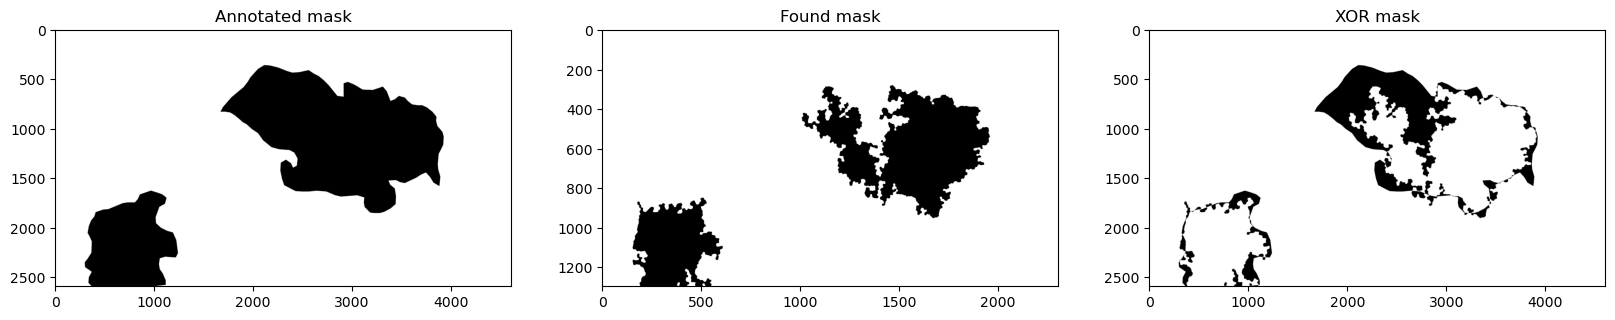

In [19]:
# show annoted mask, found mask and xor mask 
for i in range(len(xor_imgs)):
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(annotated_masks[i], cv2.COLOR_BGR2RGB))
    plt.title('Annotated mask')
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(found_masks[i], cv2.COLOR_BGR2RGB))
    plt.title('Found mask')
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(xor_imgs[i], cv2.COLOR_BGR2RGB))
    plt.title('XOR mask')
    plt.show()

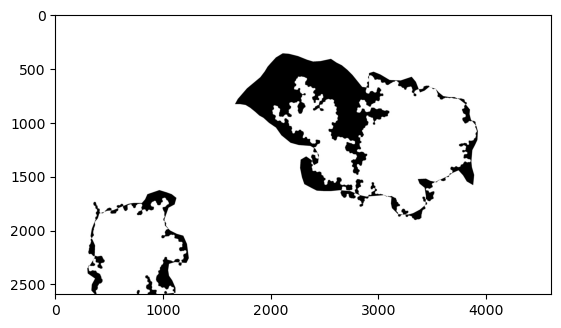

In [28]:
xor_img = cv2.imread('ilastik/h2r1/hive2_rpi1_240419-194501Z.bmp')
plt.imshow(xor_img)